# Prediction using Supervised ML
### Author: Haseeb Ahmad
### Function: Data Science and Business Analytics
### Task 1: Predict the percentage of student based on the no. of study hours.

This is a simple linear regression task as it involves just 2 variables.

### Importing libraries

In [57]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### Creating dataframe

In [27]:
dataset = pd.read_csv('http://bit.ly/w-data')
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Now we can plot our data points on a 2-D graph to visualize our dataset and see if we can manuually find any relationship between the data.

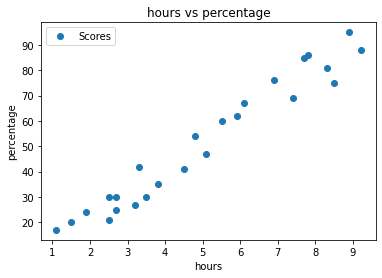

In [28]:
# plotting the distribution of scores

dataset.plot(x='Hours',y='Scores',style='o')
plt.title('hours vs percentage')
plt.xlabel('hours')
plt.ylabel('percentage')
plt.show()

### Preparing the data
Dividing the dataset into features (input) and  target (output).

In [29]:
X = dataset.iloc[:,:-1].values # hours
y = dataset.iloc[:,1].values   # scores

In [30]:
np.shape(X)

(25, 1)

In [31]:
np.shape(y)

(25,)

Now that we have our feature and target, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [32]:
# splitting the dataset into the training and validation sets

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

### Training the Algorithm
We have split our data into training and testing sets, now we will train our algorithm.

In [33]:
# creating and training our model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

print('Training Complete')


Training Complete


### Coefficient of determination
The coefficient of determination is a measurement used to explain how much variability of one factor can be caused by its relationship to another related factor. This correlation, known as the "goodness of fit," is represented as a value between 0.0 and 1.0. It is commonly known as R-squared.

In [47]:
r_sq = regressor.score(X_train,y_train)
print('coefficient of detemination:',r_sq)

coefficient of detemination: 0.9515510725211552


### Linear Regression Line
The estimated regression line has the equation f(x) = mx+c. The .coef_ will give us the gradient and .intercept_ will give us y-intercept of the best fit line.

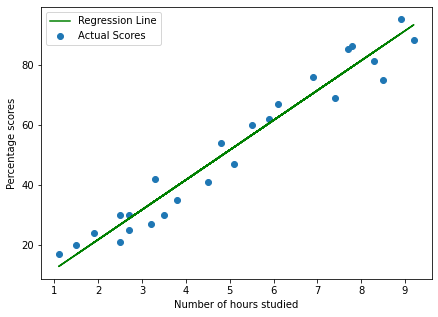

In [48]:
# plotting the regression line 
line = regressor.coef_ *X+regressor.intercept_

plt.scatter(X,y,label='Actual Scores')
plt.plot(X,line,color='green',label='Regression Line')
plt.xlabel('Number of hours studied')
plt.ylabel('Percentage scores')
plt.legend()
plt.rcParams['figure.figsize'] = [7,5]
plt.show()

### Predicting the scores for test data

In [49]:
preds = regressor.predict(X_test)
preds

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [50]:
np.shape(X_test)

(5, 1)

In [51]:
np.shape(preds)

(5,)

### Actual vs Predicted Percentage Scores

In [52]:
df = pd.DataFrame({'Actual':y_test,'Predicted':preds})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


###  Predicting the score if student studies for 9.25 hours

In [54]:
# predicting the score if studies for 9.25 hours 

hours = 9.25
score_pred = regressor.predict([[hours]])

print('Number of hours studied = {}'.format(hours))
print('Predicted score = {}'.format(score_pred[0]))


Number of hours studied = 9.25
Predicted score = 93.69173248737538


### Evaluating the performance of the model through Mean Absolute Error

In [56]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,preds)
print('Mean absolute error: {}'.format(mae))

Mean absolute error: 4.183859899002975
